#### Libraries (base)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

#### Load Dataset

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

/Users/lecha/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housi

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df['PRICE'] = boston.target
display(df.shape)
df.head()

(506, 14)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
## Independent and Dependent Features
X = df.iloc[:, :-1] ## independent features
y = df.iloc[:, -1]  ## dependent features

#### Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
## define estimator
regressor = LinearRegression()
regressor

LinearRegression()

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
mse = cross_val_score(estimator=regressor, X=X, y=y, scoring='neg_mean_squared_error', cv=5)
display(mse)
np.mean(mse)

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

-37.13180746769922

#### Ridge Regression

In [10]:
from sklearn.linear_model import Ridge

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
ridge = Ridge()
ridge

Ridge()

In [13]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 40, 50, 100]}

In [14]:
ridge_regressor = GridSearchCV(estimator=ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=5, verbose=1)
ridge_regressor.fit(X=X,y=y)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 40, 50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [15]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-29.905701947540372


#### Lasso Regression

In [16]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [17]:
lasso = Lasso()
lasso

Lasso()

In [18]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 40, 50, 100]}

In [19]:
lasso_regressor = GridSearchCV(estimator=lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)

In [20]:
lasso_regressor.fit(X=X, y=y)

/Users/lecha/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.476e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
/Users/lecha/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.284e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
/Users/lecha/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 40, 50, 100]},
             scoring='neg_mean_squared_error')

In [21]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-35.531580220694856


#### Elastic Net Regression

In [22]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [23]:
enet = ElasticNet()
enet

ElasticNet()

In [24]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 40, 50, 100]}
parameters['l1_ratio'] = np.arange(0, 1, 0.1)

In [25]:
enet_regressor = GridSearchCV(estimator=enet, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)

In [26]:
enet_regressor.fit(X=X, y=y)

/Users/lecha/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+03, tolerance: 3.919e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/lecha/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.504e+03, tolerance: 3.307e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers impl

/Users/lecha/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.445e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
/Users/lecha/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.237e+03, tolerance: 2.814e+00
  model = cd_fast.enet_coordinate_descent(
/Users/lecha/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 40, 50, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_mean_squared_error')

In [27]:
print('MAE: %.3f' % enet_regressor.best_score_)
print('Config: %s' % enet_regressor.best_params_)

MAE: -30.628
Config: {'alpha': 1, 'l1_ratio': 0.0}


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
pred_lasso = lasso_regressor.predict(X_test)
pred_ridge = ridge_regressor.predict(X_test)

In [30]:
import seaborn as sns

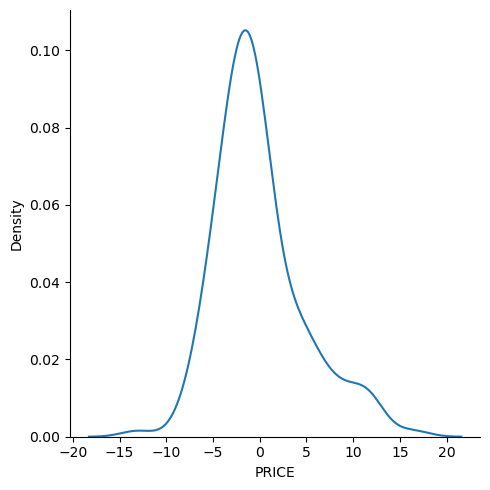

In [31]:
sns.displot(y_test - pred_lasso, kind='kde')

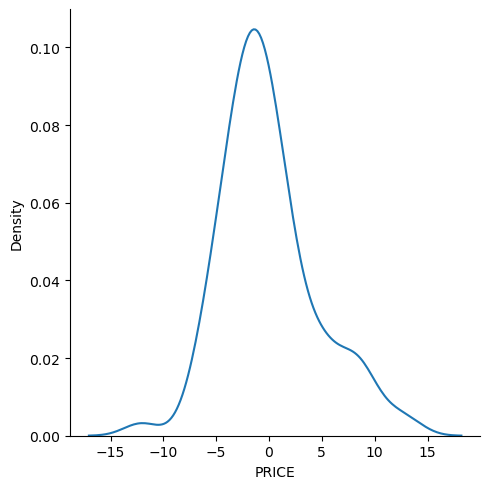

In [32]:
sns.displot(y_test - pred_ridge, kind='kde')

In [33]:
from sklearn.metrics import r2_score

In [34]:
r2_score(y_test, pred_lasso)

0.7365420976942539

In [35]:
r2_score(y_test, pred_ridge)

0.7604359914328149